In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_raw_df.shape

(64461, 61)

In [5]:
print('There are 64461 rows and 61 columns in the survey-results-public dataset.')

There are 64461 rows and 61 columns in the survey-results-public dataset.


The rows are 644461 rows are the `644461 people` who submitted the survey.
<br>
The 61 columns are the `61 questions` asked to each person who filled the form

The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

In [6]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that shortcodes for questions have been used as column names. 

We can refer to the `survey-results-schema.csv` to see the full text of each question. 
<br>
The `survey-results-schema.csv` contains only two columns: 
<ol>
    <li>`Column`</li>
    <li>`QuestionText`</li>
</ol> 

We can load it as Pandas Series with `Column` as the index and the  `QuestionText` as the value.

In [7]:
schema_raw = pd.read_csv('survey_results_schema.csv')

In [8]:
schema_raw

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [9]:
schema_raw.set_index('Column', inplace = True)

In [10]:
schema_raw

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [11]:
schema_raw.QuestionText

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [12]:
schema_raw = schema_raw.QuestionText

In [13]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

Now `schema_raw` is not a dataframe it is a pandas series or in other words an attribue or a column.

In [14]:
schema_raw['NEWEdImpt']

'How important is a formal education, such as a university degree in computer science, to your career?'

As `schema_raw` has become a series now we can directly access the QuestionText from schema_raw by using the index values which are the short forms / short hands for the Full Questions

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [15]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [16]:
len(selected_columns)

20

In [17]:
survey_raw_df[selected_columns]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
survey_df = survey_raw_df[selected_columns].copy()

In [19]:
schema = schema_raw[selected_columns]

In [20]:
survey_df.shape

(64461, 20)

In [21]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [22]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

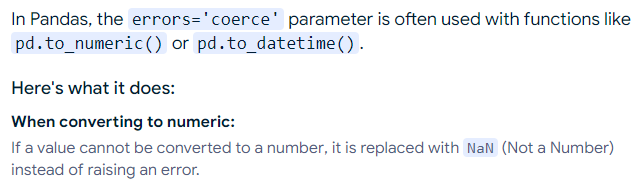

Let's now view some basic statistics about numeric columns.

In [23]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the `.drop` method, [as explained here](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).

In [24]:
survey_df.Age < 10

0        False
1        False
2        False
3        False
4        False
         ...  
64456    False
64457    False
64458    False
64459    False
64460    False
Name: Age, Length: 64461, dtype: bool

In [25]:
survey_df[survey_df.Age < 10]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
8793,India,3.0,Man,NaN,"Computer science, computer engineering, or sof...",Yes,26.0,3.0,NaN,HTML/CSS;Java;JavaScript;SQL,NaN,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,Academic researcher;Data scientist or machine ...,NaN,NaN,Office environment or company culture,NaN,NaN
11600,Viet Nam,5.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,NaN,1.0,NaN,NaN,Assembly;Bash/Shell/PowerShell;C++;Go;Python,Once every few years,Visit Stack Overflow,Student,NaN,NaN,NaN,Diversity of the company or organization;Langu...,NaN,NaN
12271,Nigeria,1.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,23.0,NaN,NaN,C++;HTML/CSS;Python;SQL,HTML/CSS;Python;SQL,NaN,Meditate;Call a coworker or friend;Visit Stack...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Specific depa...,NaN,NaN
20042,Indonesia,1.0,Woman;Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,20.0,5.0,1.0,JavaScript,Go,Once a year,Call a coworker or friend;Go for a walk or oth...,Employed full-time,Data or business analyst;Database administrato...,9.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
25061,Netherlands,1.0,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,14.0,7.0,Bash/Shell/PowerShell;C#;C++;HTML/CSS;Java;Jav...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;K...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",65.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Somewhat important
26952,India,7.0,Woman;Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,7.0,NaN,C;C#;C++;HTML/CSS;Java;JavaScript;PHP;SQL;Type...,HTML/CSS;JavaScript;SQL;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow,"Independent contractor, freelancer, or self-em...","Developer, front-end;DevOps specialist",NaN,NaN,NaN,NaN,NaN
54687,United States,1.0,Man,I never completed any formal education,NaN,Yes,NaN,NaN,NaN,Assembly,Assembly,Once a year,Panic,Employed full-time,Academic researcher;Data or business analyst;D...,NaN,Very dissatisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,NaN
58292,Indonesia,1.0,Man,I never completed any formal education,NaN,Yes,NaN,3.0,2.0,JavaScript;PHP;SQL,Go;TypeScript,Every few months,Meditate;Play games,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",50.0,Slightly satisfied,Specific department or team I’d be working on,Often: 1-2 days per week or more,NaN
64383,Indonesia,1.0,Woman,I never completed any formal education,NaN,Yes,NaN,1.0,1.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,Meditate;Play games;Call a coworker or friend;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
survey_df[survey_df.Age < 10].index

Index([8793, 11600, 12271, 20042, 25061, 26952, 54687, 58292, 64383], dtype='int64')

In [27]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)

Now lets do the same thing for `Age > 100`

In [28]:
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [29]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [30]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [31]:
survey_df.Gender.str.contains(';')

0        False
1          NaN
2          NaN
3        False
4        False
         ...  
64456      NaN
64457      NaN
64458      NaN
64459      NaN
64460      NaN
Name: Gender, Length: 64306, dtype: object

In [32]:
survey_df.Gender.str.contains(';', na=False)

0        False
1        False
2        False
3        False
4        False
         ...  
64456    False
64457    False
64458    False
64459    False
64460    False
Name: Gender, Length: 64306, dtype: bool

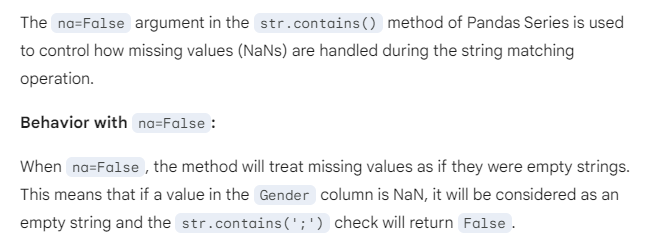
<br>
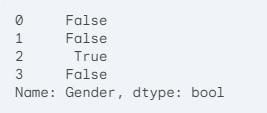


In [33]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), inplace=True)

In [34]:
survey_df.Gender.value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [35]:
survey_df.where(~(survey_df.Gender.str.contains(',', na=False)), inplace=True)

In [36]:
survey_df.Gender.value_counts()

Gender
Man      45895
Woman     3835
Name: count, dtype: int64

In [37]:
survey_df.sample(3)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
5139,United States,63.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,11.0,46.0,36.0,C;C++;HTML/CSS;Java;JavaScript;Perl;Python,C;C++;Java;Julia;Python,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed part-time,Academic researcher,20.0,Very satisfied,Industry that I’d be working in;How widely use...,Sometimes: 1-2 days per month but less than we...,Very important
39947,United States,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,10.0,5.0,C;C++;Go;Java;JavaScript;Objective-C;Python;Sc...,C;C++;Go;Python,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Engineer, data",50.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
58794,Argentina,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,Yes,15.0,7.0,2.0,C#;HTML/CSS;JavaScript;PHP;Python,JavaScript;Python,Every few months,NaN,Employed full-time,"Developer, full-stack",30.0,Very satisfied,Flex time or a flexible schedule,Occasionally: 1-2 days per quarter but less th...,Somewhat important


## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [38]:
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [39]:
schema.Country

'Where do you live?'

In [40]:
survey_df.Country.unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic', nan,
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Iran', 'Croatia', 'Egypt', 'Argentina', 'Ghana',
       'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guatemala', '

In [41]:
survey_df.Country.nunique()

183

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [42]:
top_countries = survey_df.Country.value_counts().head(15)

In [43]:
top_countries

Country
United States         12240
India                  8352
United Kingdom         3846
Germany                3835
Canada                 2152
France                 1866
Brazil                 1799
Netherlands            1325
Poland                 1256
Australia              1186
Spain                  1148
Italy                  1109
Russian Federation     1084
Sweden                  869
Pakistan                802
Name: count, dtype: int64

In [44]:
type(top_countries)

pandas.core.series.Series

You can't use a series as a data source in sns

The datasource should be a dataframe

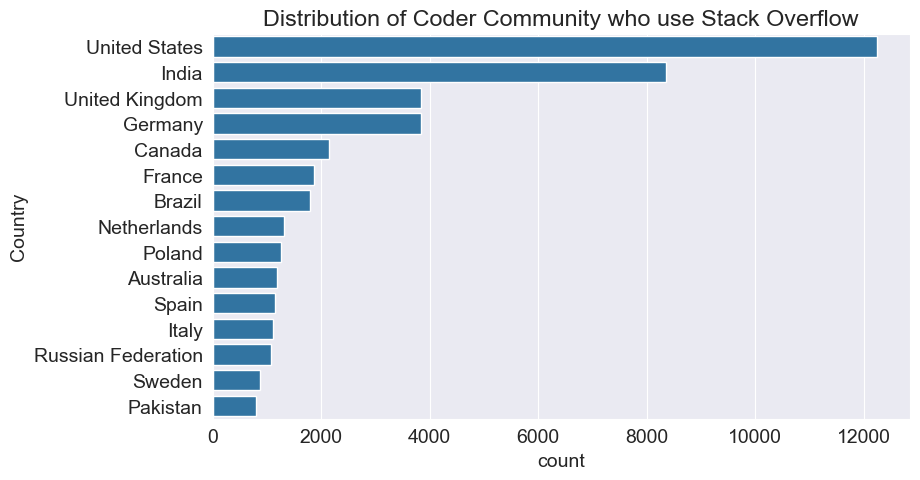

In [46]:
plt.title('Distribution of Coder Community who use Stack Overflow')
sns.barplot(x=top_countries, y=top_countries.index);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

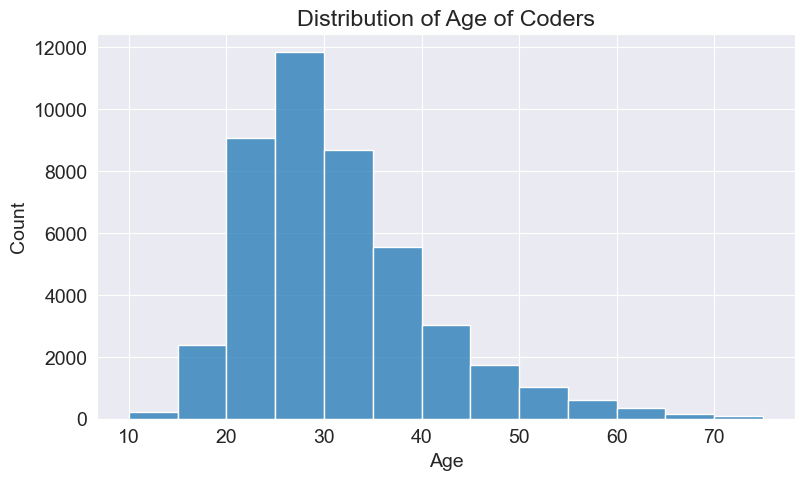

In [47]:
plt.title('Distribution of Age of Coders')
sns.histplot(survey_df.Age, bins=np.arange(10, 80, 5));

It appears that a large percentage of respondents are `20-40` years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

### Gender

Let's look at the distribution of responses for the Gender.

In [48]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [49]:
gender_counts = survey_df.Gender.value_counts()

In [50]:
gender_counts

Gender
Man      45895
Woman     3835
Name: count, dtype: int64

A pie chart would be a great way to visualize the distribution.

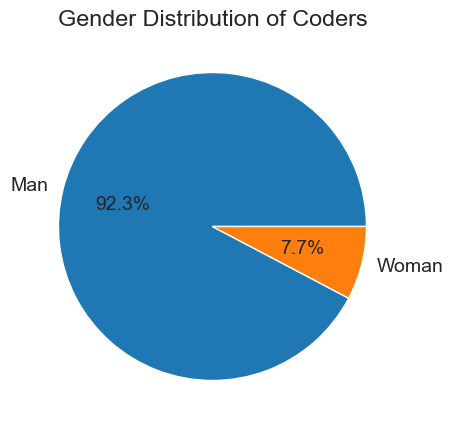

In [51]:
plt.title('Gender Distribution of Coders')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%');

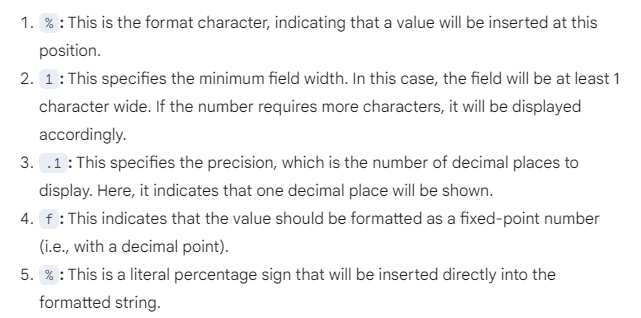

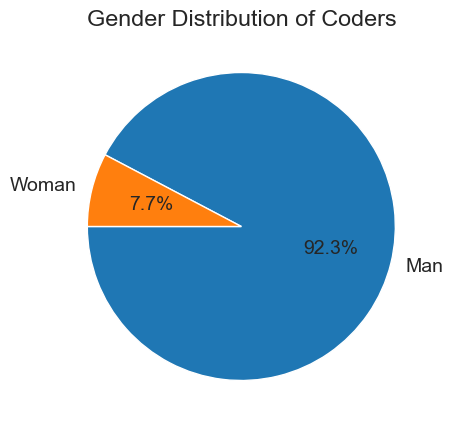

In [52]:
plt.title('Gender Distribution of Coders')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle = 180);

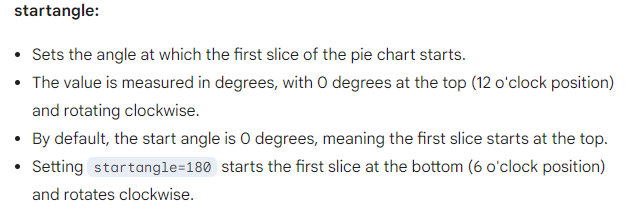
<br>
Why do we need `startangle` ?<br>
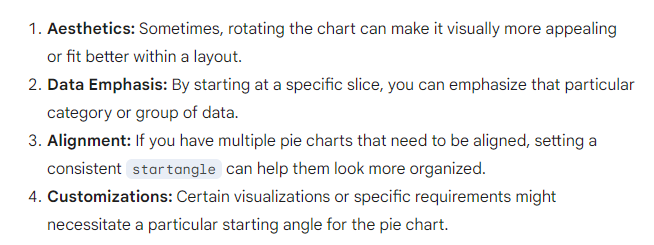
<br>
In our case the pie chart looks better after using the `startangle`

### Education

In [53]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

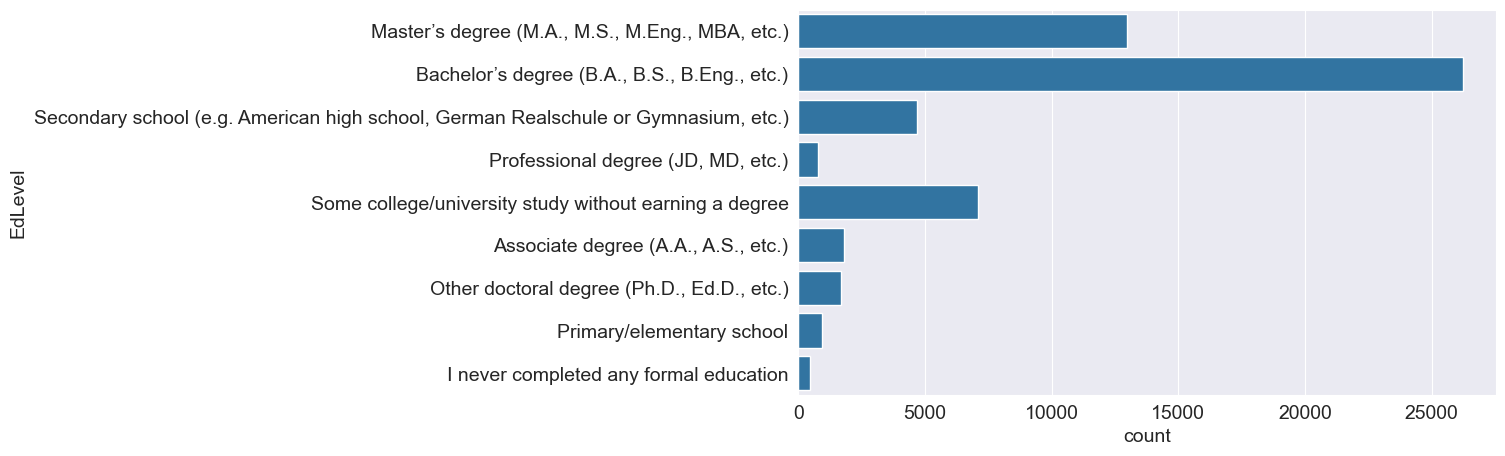

In [54]:
sns.countplot(y=survey_df.EdLevel);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

### Uder-Graduate Major

In [55]:
schema.UndergradMajor

'What was your primary field of study?'

`pct`: percentage

In [56]:
survey_df.UndergradMajor.value_counts()

UndergradMajor
Computer science, computer engineering, or software engineering                   31195
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4723
Information systems, information technology, or system administration              4026
A natural science (such as biology, chemistry, physics, etc.)                      2155
Mathematics or statistics                                                          1819
Web development or web design                                                      1761
A business discipline (such as accounting, finance, marketing, etc.)               1360
A humanities discipline (such as literature, history, philosophy, etc.)             980
A social science (such as anthropology, psychology, political science, etc.)        911
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      698
I never declared a major                                                            444
A health science 

What we are going to do is with value_counts() we will take each and every filed divide it by total and then multiply by 100 which will give us percentage.

In [57]:
survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

UndergradMajor
Computer science, computer engineering, or software engineering                   61.999404
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.386863
Information systems, information technology, or system administration              8.001590
A natural science (such as biology, chemistry, physics, etc.)                      4.283017
Mathematics or statistics                                                          3.615224
Web development or web design                                                      3.499950
A business discipline (such as accounting, finance, marketing, etc.)               2.702971
A humanities discipline (such as literature, history, philosophy, etc.)            1.947729
A social science (such as anthropology, psychology, political science, etc.)       1.810593
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.387260
I never declared a major                                         

In [58]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

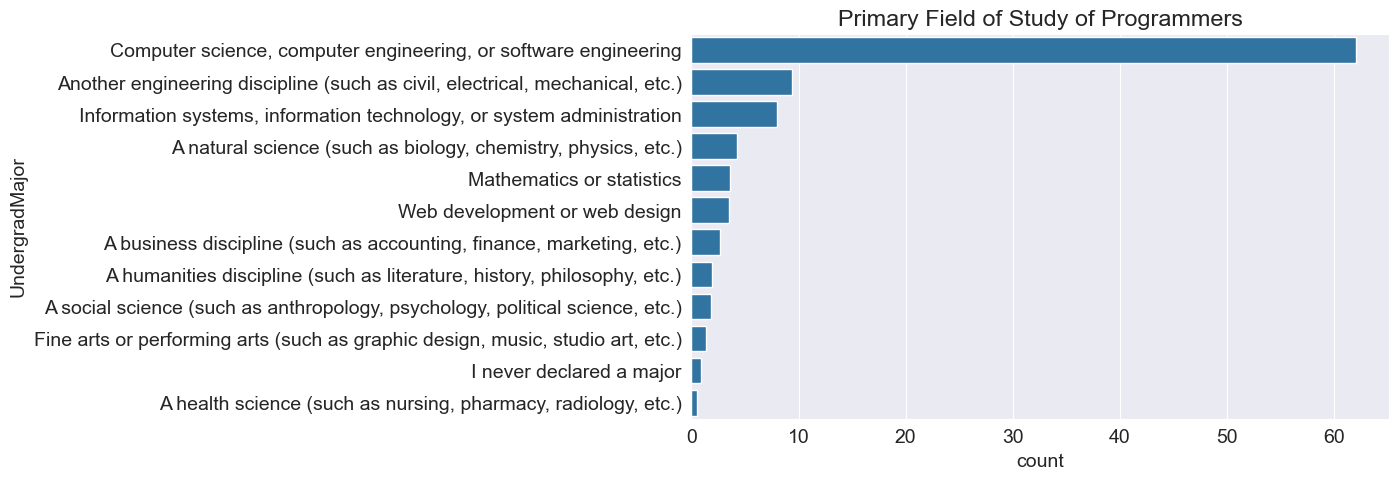

In [59]:
plt.title('Primary Field of Study of Programmers')
sns.barplot(x=undergrad_pct, y=undergrad_pct.index);

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [60]:
schema.Employment

'Which of the following best describes your current employment status?'

In [61]:
survey_df.Employment.value_counts()

Employment
Employed full-time                                      44717
Student                                                  7664
Independent contractor, freelancer, or self-employed     5596
Not employed, but looking for work                       2306
Employed part-time                                       2177
Not employed, and not looking for work                    312
Retired                                                   240
Name: count, dtype: int64

In [62]:
employment_pct = survey_df.Employment.value_counts()*100 / survey_df.Employment.count()

In [63]:
employment_pct

Employment
Employed full-time                                      70.965848
Student                                                 12.162763
Independent contractor, freelancer, or self-employed     8.880848
Not employed, but looking for work                       3.659620
Employed part-time                                       3.454897
Not employed, and not looking for work                   0.495144
Retired                                                  0.380880
Name: count, dtype: float64

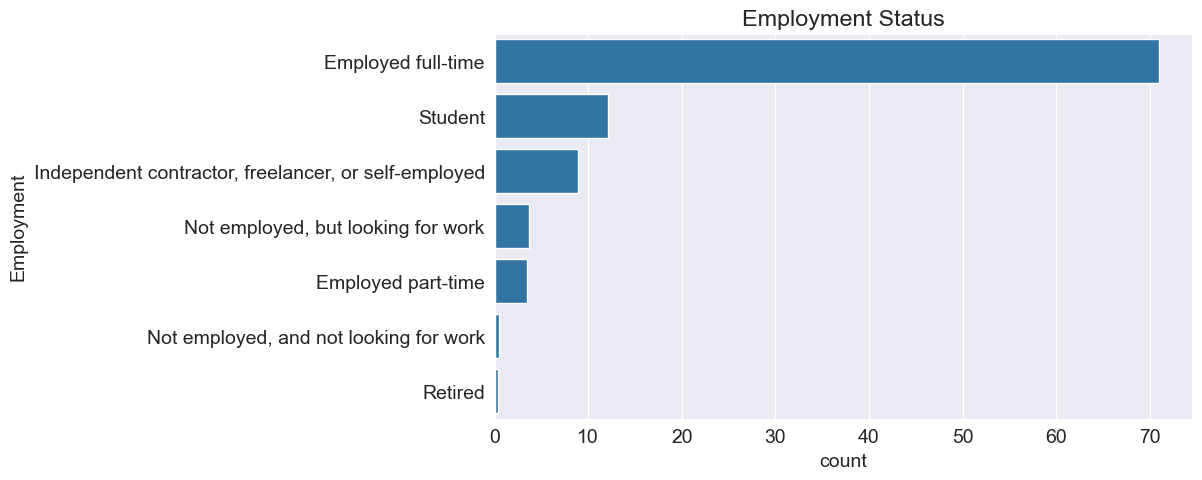

In [64]:
plt.title('Employment Status')
sns.barplot(x=employment_pct, y=employment_pct.index);

It appears that close to `10%`of respondents are employed part time or as freelancers.

### Developer Type

In [65]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [66]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                     4375
Developer, back-end                                                                                                                       3040
Developer, back-end;Developer, front-end;Developer, full-stack                                                                            2201
Developer, back-end;Developer, full-stack                                                                                                 1457
Developer, front-end                                                                                                                      1385
                                                                                                                                          ... 
Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Educator;Product manager

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`. We will create a function which will take this column / series as input and will return a dataframe which will have a separate column for each and every developer domain.

### _.index_

In [67]:
survey_df.DevType.value_counts().index

Index(['Developer, full-stack', 'Developer, back-end',
       'Developer, back-end;Developer, front-end;Developer, full-stack',
       'Developer, back-end;Developer, full-stack', 'Developer, front-end',
       'Developer, mobile', 'Developer, front-end;Developer, full-stack',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack',
       'Developer, back-end;Developer, desktop or enterprise applications',
       'Developer, desktop or enterprise applications',
       ...
       'Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile;Developer, QA or test;DevOps specialist;Engineering manager;Product manager',
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, QA or test;DevOps specialist;Scientist;System administrator',
 

### _.to_frame()_ : 
Coverts a series to a dataframe

In [69]:
survey_df.DevType.to_frame()

,DevType
0,"Developer, desktop or enterprise applications;..."
1,"Developer, full-stack;Developer, mobile"
2,NaN
3,NaN
4,NaN
...,...
64456,Senior executive/VP
64457,NaN
64458,NaN
64459,NaN


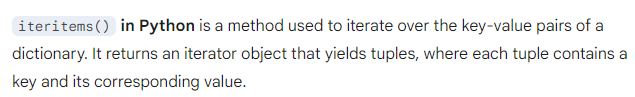

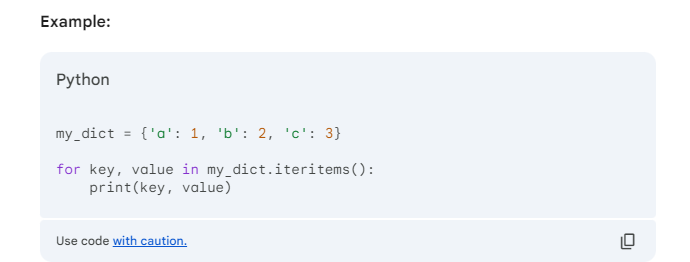

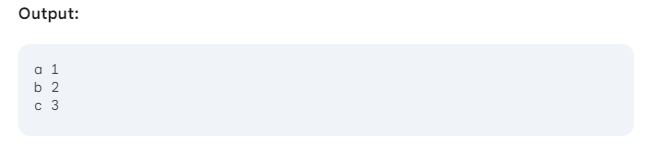

We did not use `iteritems()` we used `items()` as iteritems() was giving an error. But how it works is the same.

In [70]:
survey_df.DevType[0]

'Developer, desktop or enterprise applications;Developer, full-stack'

In [71]:
survey_df.DevType

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64306, dtype: object

In [72]:
'Developer, desktop or enterprise applications;Developer, full-stack'.split(',')

['Developer', ' desktop or enterprise applications;Developer', ' full-stack']

We did all of this so that you will be able to better understand how our function works

In [74]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []

    for idx, value in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False

            result_df.at[idx, option] = True
    return result_df[options]

In [75]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [76]:
dev_type_df.loc[0]

Developer, desktop or enterprise applications     True
Developer, full-stack                             True
Developer, mobile                                False
Designer                                         False
Developer, front-end                             False
Developer, back-end                              False
Developer, QA or test                            False
DevOps specialist                                False
Developer, game or graphics                      False
Database administrator                           False
Developer, embedded applications or devices      False
Engineer, data                                   False
Educator                                         False
System administrator                             False
Engineering manager                              False
Product manager                                  False
Data or business analyst                         False
Academic researcher                              False
Data scien

In [77]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
dev_type_df.sum()

Developer, desktop or enterprise applications    11625
Developer, full-stack                            26753
Developer, mobile                                 9365
Designer                                          5220
Developer, front-end                             18020
Developer, back-end                              26836
Developer, QA or test                             3865
DevOps specialist                                 5870
Developer, game or graphics                       2718
Database administrator                            5621
Developer, embedded applications or devices       4674
Engineer, data                                    3681
Educator                                          2873
System administrator                              5137
Engineering manager                               2684
Product manager                                   2463
Data or business analyst                          3944
Academic researcher                               3476
Data scien

In [79]:
dev_type_df.sum().sort_values(ascending=False)

Developer, back-end                              26836
Developer, full-stack                            26753
Developer, front-end                             18020
Developer, desktop or enterprise applications    11625
Developer, mobile                                 9365
DevOps specialist                                 5870
Database administrator                            5621
Designer                                          5220
System administrator                              5137
Developer, embedded applications or devices       4674
Data or business analyst                          3944
Data scientist or machine learning specialist     3916
Developer, QA or test                             3865
Engineer, data                                    3681
Academic researcher                               3476
Educator                                          2873
Developer, game or graphics                       2718
Engineering manager                               2684
Product ma

In [80]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)

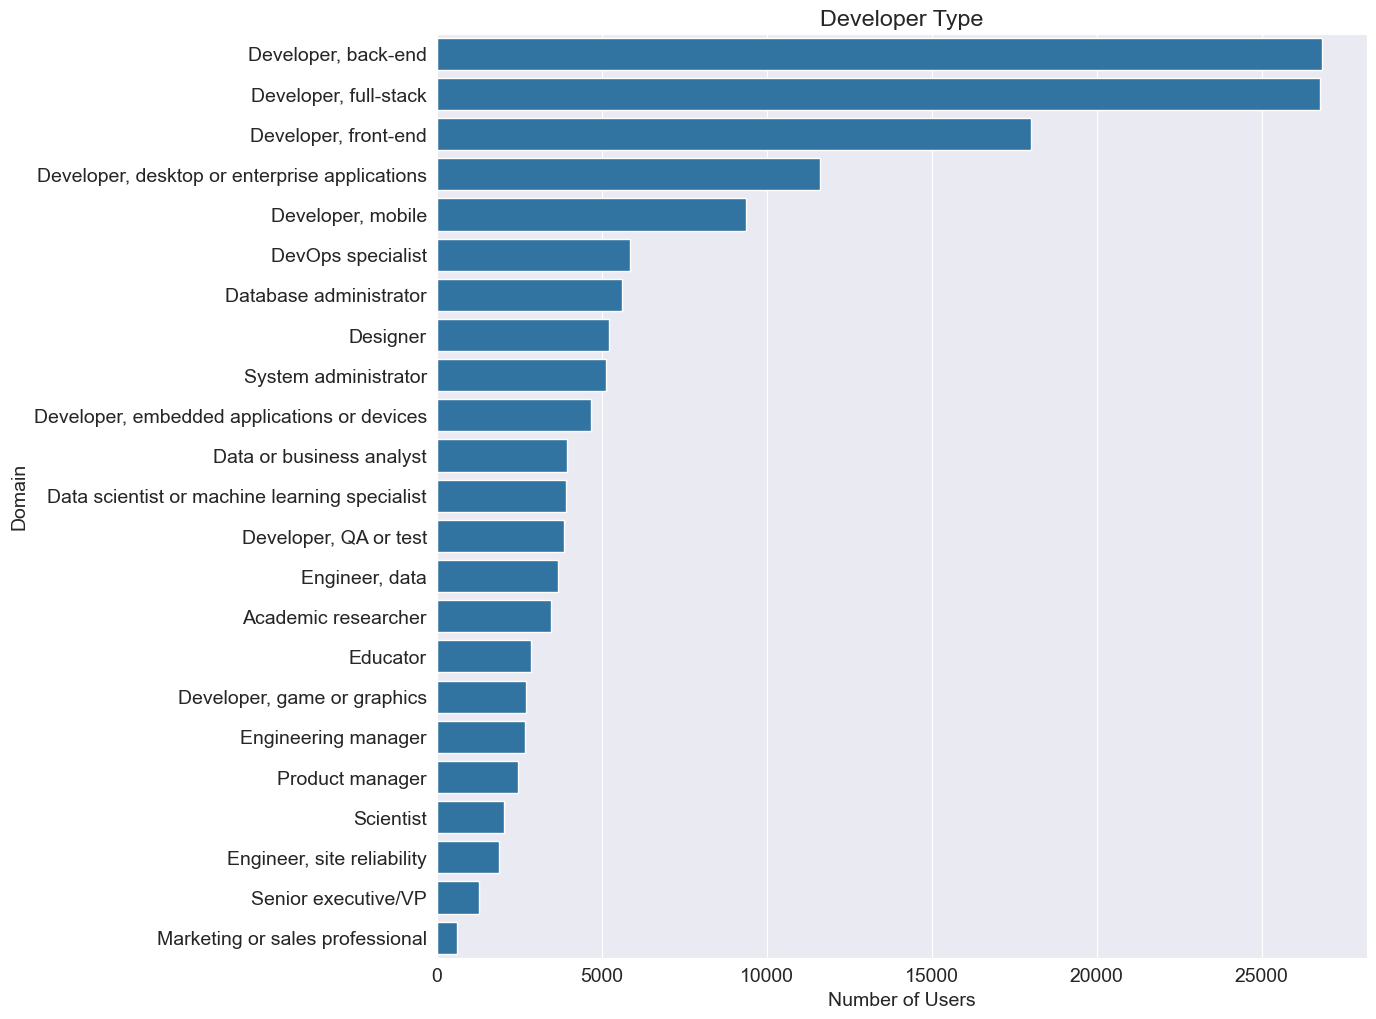

In [81]:
plt.figure(figsize=(12, 12))
plt.title('Developer Type')
plt.xlabel('Number of Users')
plt.ylabel('Domain')
sns.barplot(x=dev_type_totals, y=dev_type_totals.index);

From the above plot it is visible that majority of the Coders are Backend Developers or Full Stack Developers.

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q: What are the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [82]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [83]:
survey_df.LanguageWorkedWith.value_counts()

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL                                                                                         1061
HTML/CSS;JavaScript                                                                                                  886
C#;HTML/CSS;JavaScript;SQL                                                                                           844
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                                740
HTML/CSS;JavaScript;TypeScript                                                                                       690
                                                                                                                    ... 
Bash/Shell/PowerShell;Go;Java;JavaScript;Python;Ruby;SQL;TypeScript                                                    1
Bash/Shell/PowerShell;C;C++;HTML/CSS;Julia;Python                                                                      1
C#;JavaScript

In [84]:
languages_worked_with_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [85]:
languages_worked_with_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
languages_worked_with_df.sum().sort_values(ascending=False)

JavaScript               38253
HTML/CSS                 35624
SQL                      30962
Python                   24867
Java                     22768
Bash/Shell/PowerShell    18631
C#                       17775
PHP                      14790
TypeScript               14355
C++                      13483
C                        12275
Go                        4935
Kotlin                    4397
Ruby                      3949
Assembly                  3461
VBA                       3444
Swift                     3343
R                         3221
Rust                      2837
Objective-C               2300
Dart                      2246
Scala                     2013
Perl                      1750
Haskell                   1168
Julia                      498
dtype: int64

In [87]:
languages_worked_with_df.count()

C#                       64306
HTML/CSS                 64306
JavaScript               64306
Swift                    64306
Objective-C              64306
Python                   64306
Ruby                     64306
SQL                      64306
Java                     64306
PHP                      64306
C                        64306
TypeScript               64306
Bash/Shell/PowerShell    64306
Kotlin                   64306
R                        64306
VBA                      64306
Perl                     64306
Scala                    64306
C++                      64306
Go                       64306
Haskell                  64306
Rust                     64306
Dart                     64306
Julia                    64306
Assembly                 64306
dtype: int64

In [88]:
languages_worked_with_df.sum() * 100 / languages_worked_with_df.count()

C#                       27.641278
HTML/CSS                 55.397630
JavaScript               59.485896
Swift                     5.198582
Objective-C               3.576649
Python                   38.669798
Ruby                      6.140951
SQL                      48.147918
Java                     35.405716
PHP                      22.999409
C                        19.088421
TypeScript               22.322956
Bash/Shell/PowerShell    28.972413
Kotlin                    6.837620
R                         5.008864
VBA                       5.355643
Perl                      2.721363
Scala                     3.130346
C++                      20.966939
Go                        7.674245
Haskell                   1.816316
Rust                      4.411719
Dart                      3.492676
Julia                     0.774422
Assembly                  5.382079
dtype: float64

In [89]:
languages_pct = languages_worked_with_df.sum() * 100 / languages_worked_with_df.count()

In [90]:
languages_pct.sort_values(ascending=False)

JavaScript               59.485896
HTML/CSS                 55.397630
SQL                      48.147918
Python                   38.669798
Java                     35.405716
Bash/Shell/PowerShell    28.972413
C#                       27.641278
PHP                      22.999409
TypeScript               22.322956
C++                      20.966939
C                        19.088421
Go                        7.674245
Kotlin                    6.837620
Ruby                      6.140951
Assembly                  5.382079
VBA                       5.355643
Swift                     5.198582
R                         5.008864
Rust                      4.411719
Objective-C               3.576649
Dart                      3.492676
Scala                     3.130346
Perl                      2.721363
Haskell                   1.816316
Julia                     0.774422
dtype: float64

In [91]:
languages_pct = languages_pct.sort_values(ascending=False)

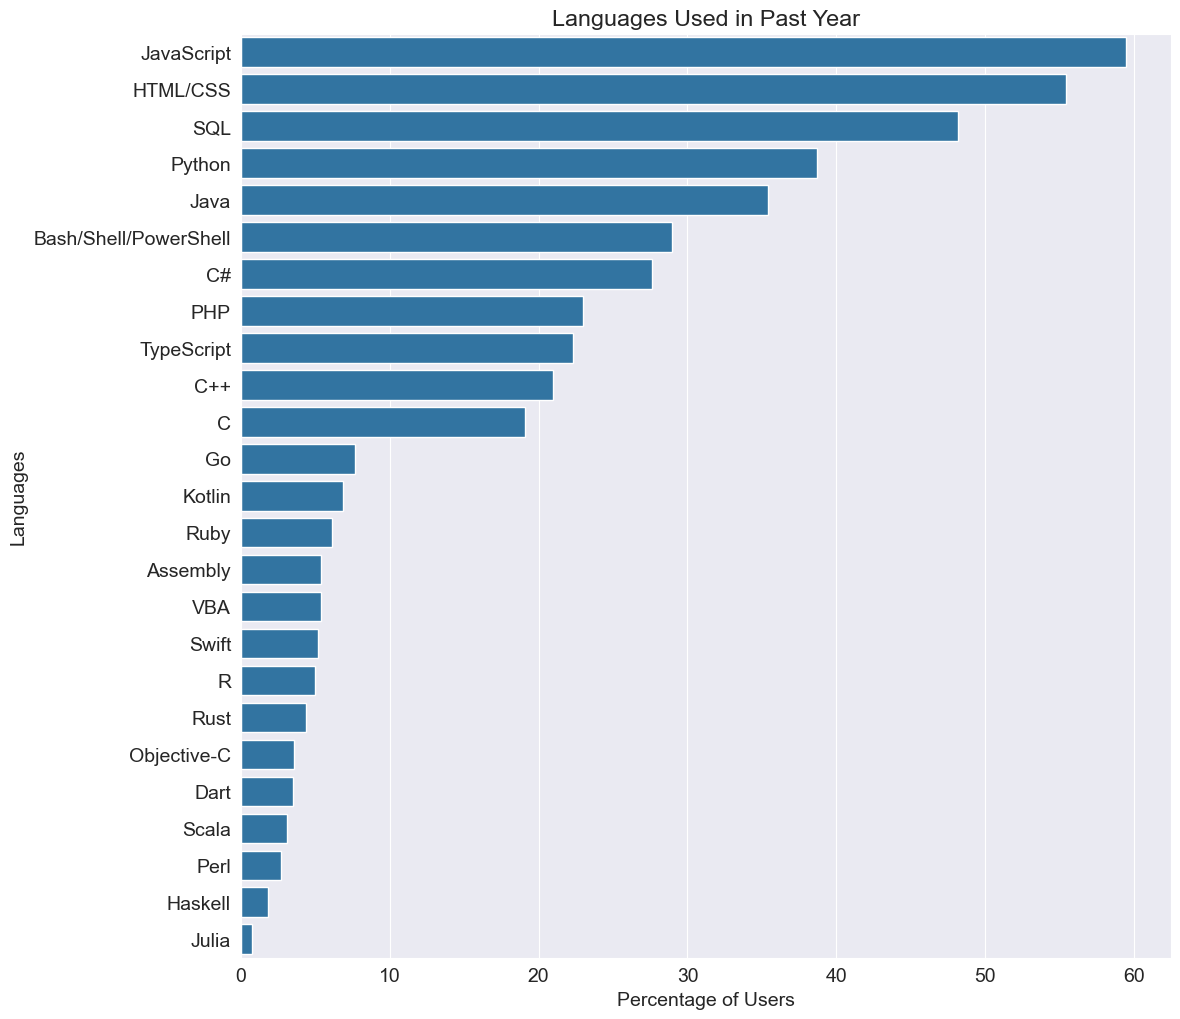

In [92]:
plt.figure(figsize=(12, 12))
plt.title('Languages Used in Past Year')
plt.xlabel('Percentage of Users')
plt.ylabel('Languages')
sns.barplot(x=languages_pct, y=languages_pct.index);

<ul>
    <li>Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills.</li>
    <li>SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly.</li>
    <li>Python seems to be the popular choice for other forms of development</li>
</ul>

#### Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [93]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [94]:
survey_df.LanguageDesireNextYear.value_counts()

LanguageDesireNextYear
Python                                                                                                                         1138
Rust                                                                                                                            521
HTML/CSS;JavaScript;TypeScript                                                                                                  497
C#                                                                                                                              455
Go                                                                                                                              408
                                                                                                                               ... 
JavaScript;R;Ruby;Scala;Swift                                                                                                     1
Bash/Shell/PowerShell;C#;C++;Go;HTML/CSS;Python;SQL;S

In [95]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)

In [96]:
languages_interested_df

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
languages_interested_df.mean().sort_values(ascending=False) * 100

Python                   40.839113
JavaScript               40.175100
HTML/CSS                 31.793301
SQL                      30.586570
TypeScript               26.286816
C#                       20.923398
Java                     20.357354
Go                       19.298355
Bash/Shell/PowerShell    17.884801
Rust                     16.102696
C++                      14.891301
Kotlin                   14.676702
PHP                      10.871458
C                         9.277517
Swift                     8.649271
Dart                      7.279259
R                         6.511057
Ruby                      6.344665
Scala                     5.302771
Haskell                   4.525239
Assembly                  3.699499
Julia                     2.505209
Objective-C               2.323267
Perl                      1.743228
VBA                       1.600162
dtype: float64

The code given below uses `mean()` for calculating percentage instead of the conventional method that we followed in the task given above.

In [98]:
languages_interested_pct = languages_interested_df.mean().sort_values(ascending=False) * 100

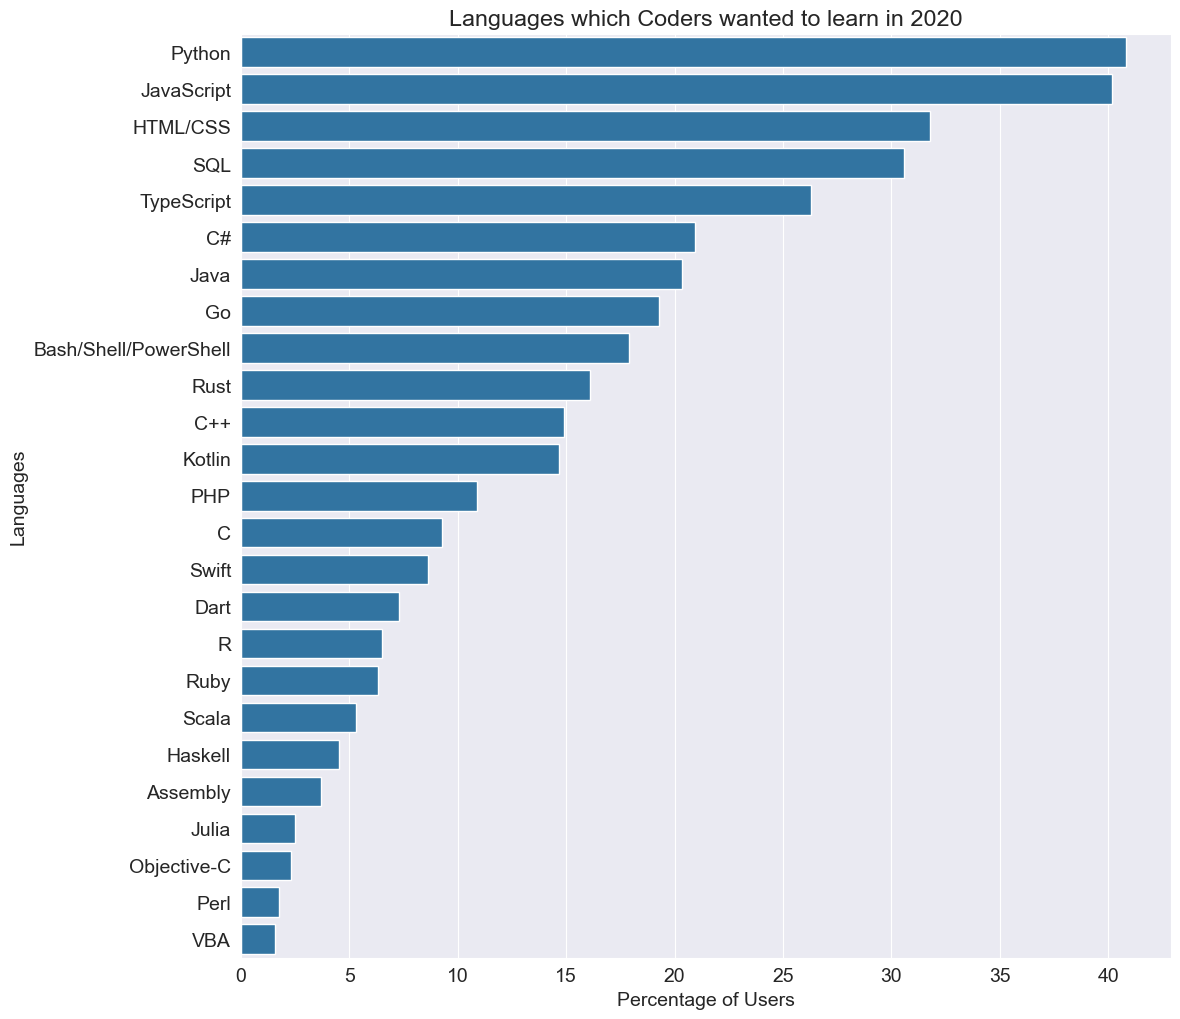

In [99]:
plt.figure(figsize=(12, 12))
plt.title('Languages which Coders wanted to learn in 2020')
plt.xlabel('Percentage of Users')
plt.ylabel('Languages')
sns.barplot(x=languages_interested_pct, y=languages_interested_pct.index);

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. We're using Python for this very analysis, so we're in good company!

#### Q: Language which a high percentage of people who have used the language want to continue learning & using it over the next year?

Here's what we can do:

- Create a new data frame `languages_liked_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`
- Take the column-wise sum of `languages_liked_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "like" the language
- Sort the results in descending order and plot a horizontal bar graph

In [100]:
languages_liked_df = languages_worked_with_df & languages_interested_df

In [101]:
languages_liked_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
languages_liked_df.sum()

Assembly                  1002
Bash/Shell/PowerShell     9998
C                         4040
C#                       10599
C++                       5853
Dart                      1396
Go                        3070
HTML/CSS                 19051
Haskell                    599
Java                     10049
JavaScript               22329
Julia                      306
Kotlin                    2767
Objective-C                533
PHP                       5506
Perl                       498
Python                   16558
R                         1428
Ruby                      1684
Rust                      2445
SQL                      17514
Scala                     1076
Swift                     1990
TypeScript                9634
VBA                        669
dtype: int64

In [103]:
languages_liked_pct = (languages_liked_df.sum() * 100 / languages_worked_with_df.sum()).sort_values(ascending=False)

In [104]:
languages_liked_pct

Rust                     86.182587
TypeScript               67.112504
Python                   66.586239
Kotlin                   62.929270
Go                       62.208713
Dart                     62.154942
Julia                    61.445783
C#                       59.628692
Swift                    59.527371
JavaScript               58.371892
SQL                      56.566113
Bash/Shell/PowerShell    53.663249
HTML/CSS                 53.477992
Scala                    53.452558
Haskell                  51.284247
R                        44.334058
Java                     44.136507
C++                      43.410220
Ruby                     42.643707
PHP                      37.227857
C                        32.912424
Assembly                 28.951170
Perl                     28.457143
Objective-C              23.173913
VBA                      19.425087
dtype: float64

When we divide two dataframes then we can be assured that the right index or the right attribute will be divided by the right attribute. As you can see in the example above the value of R in languages liked will be only divided by the value of R in the other df. It will not happen that the value of R in one df gets divided by value of PHP, C or any other language.<br>


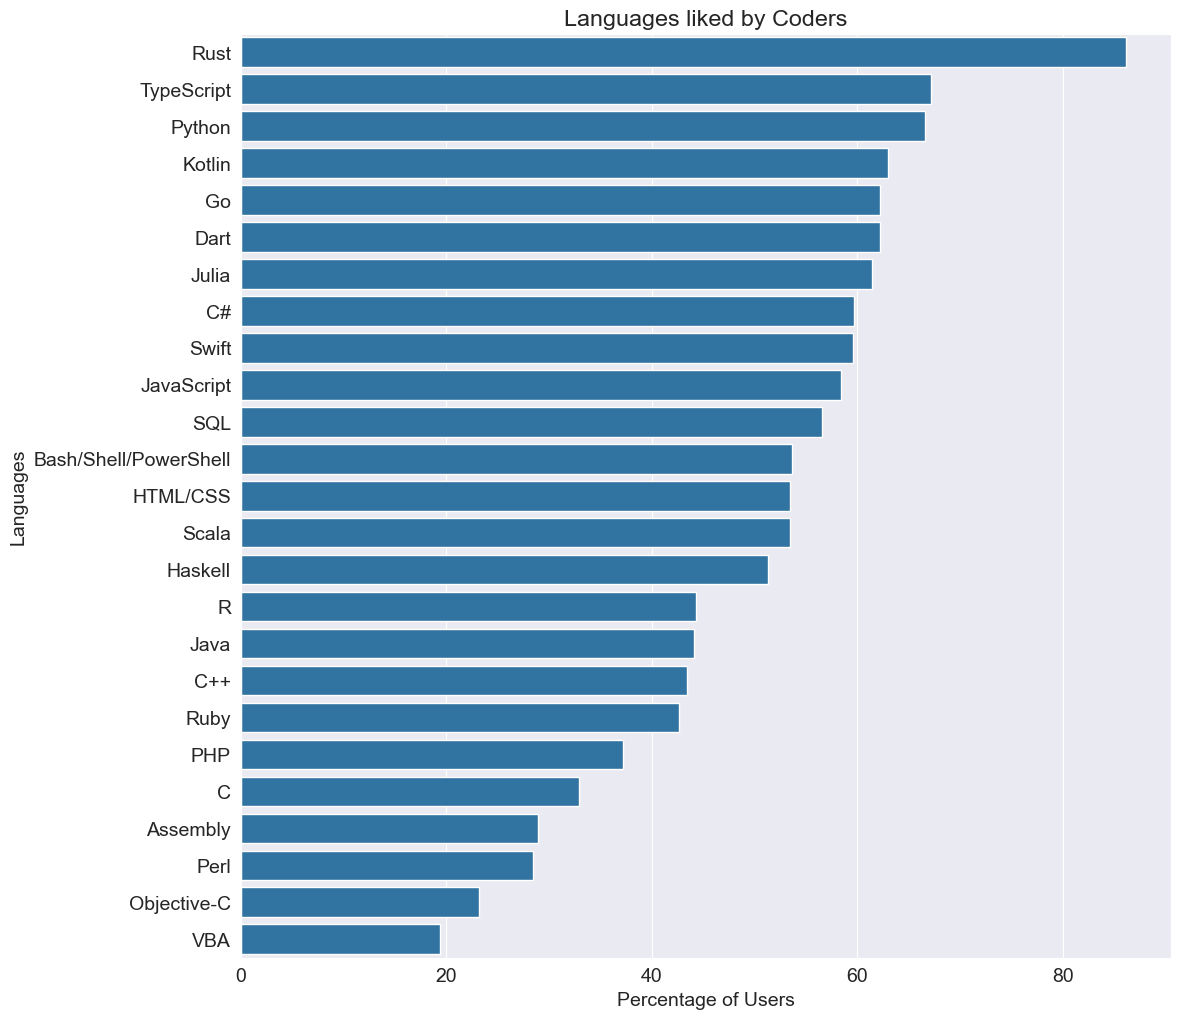

In [105]:
plt.figure(figsize=(12, 12))
plt.title('Languages liked by Coders')
plt.xlabel('Percentage of Users')
plt.ylabel('Languages')
sns.barplot(x=languages_liked_pct, y=languages_liked_pct.index);

[Rust](https://www.rust-lang.org) has been StackOverflow's most-liked language for [four years in a row](https://stackoverflow.blog/2020/01/20/what-is-rust-and-why-is-it-so-popular/). The second most-liked language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.

#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [106]:
survey_df.groupby('Country')[['WorkWeekHrs']].mean()

,WorkWeekHrs
Country,
Afghanistan,46.500000
Albania,43.962963
Algeria,36.862069
Andorra,42.000000
Angola,24.500000
...,...
"Venezuela, Bolivarian Republic of...",40.125000
Viet Nam,41.391667
Yemen,40.000000


In [107]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean()

In [108]:
countries_df = countries_df.sort_values('WorkWeekHrs', ascending=False)

In [109]:
countries_df

,WorkWeekHrs
Country,
Kuwait,54.750000
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [110]:
survey_df.Country.value_counts() > 250

Country
United States           True
India                   True
United Kingdom          True
Germany                 True
Canada                  True
                       ...  
Nauru                  False
Lesotho                False
Saint Lucia            False
Antigua and Barbuda    False
Marshall Islands       False
Name: count, Length: 183, dtype: bool

In [111]:
countries_df.loc[survey_df.Country.value_counts() > 250]

,WorkWeekHrs
Country,
Iran,44.580537
Israel,43.912322
China,42.150000
United States,41.816542
Viet Nam,41.391667
Greece,41.170588
South Africa,41.017699
Turkey,40.982143
Sri Lanka,40.496552


In [112]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250]

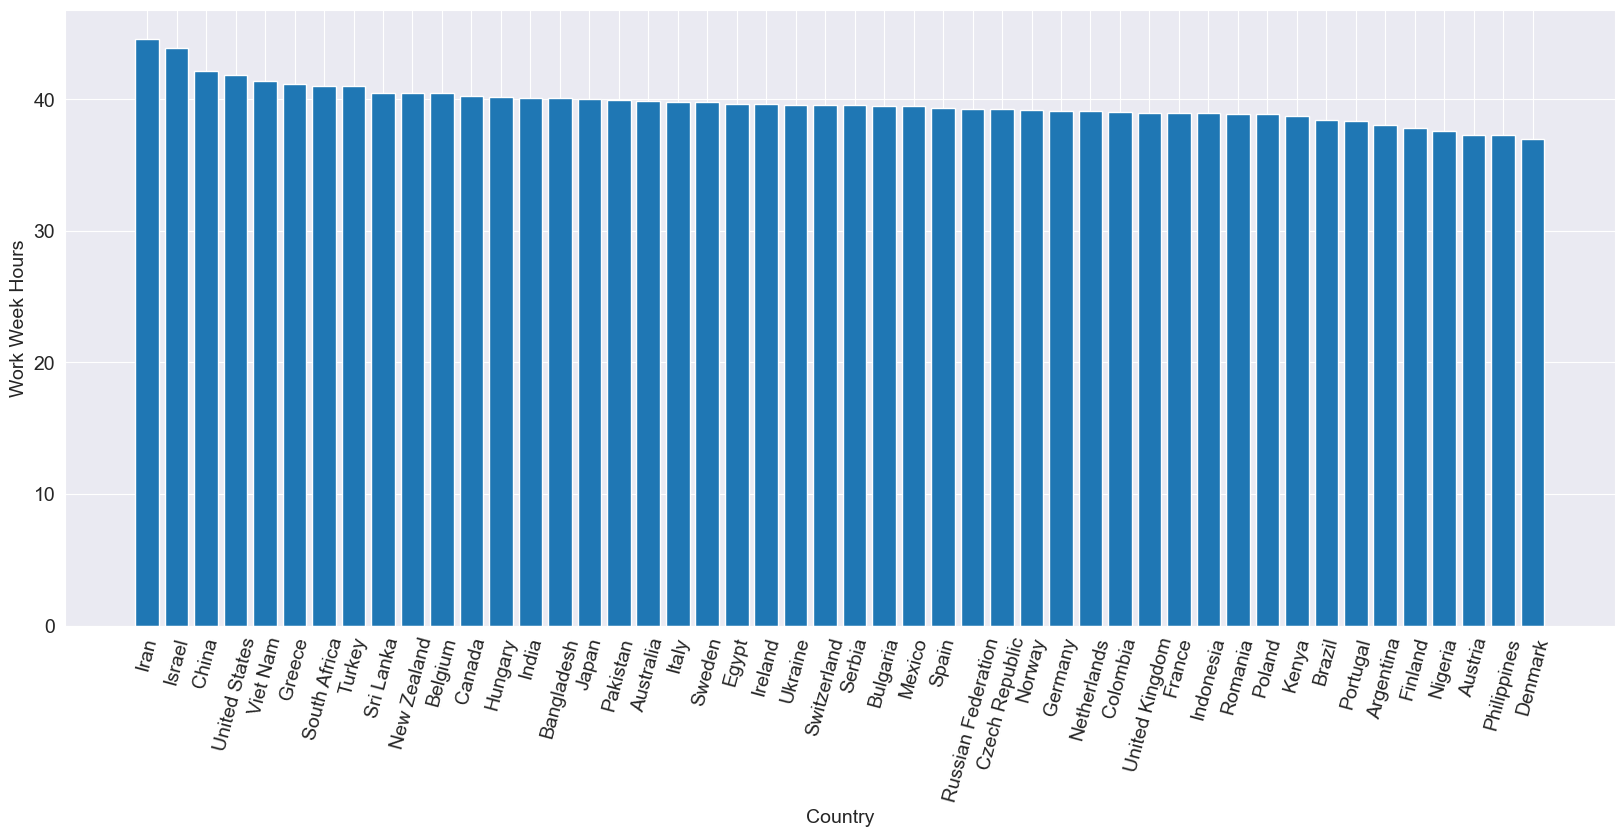

In [113]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=75)
plt.xlabel('Country')
plt.ylabel('Work Week Hours')
plt.bar(high_response_countries_df.index, high_response_countries_df.WorkWeekHrs);

The Asian countries like Iran, Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- The survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries.

- Although most programmers hold a college degree, a reasonably large percentage(40%) did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "liked" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.